In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pickle
import matplotlib.pyplot as plt
import math

c:\users\eva\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\eva\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\eva\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\eva\appdata\loca

### Načtení trénovacích datasetů

- Exony a introny jsou z DNA sekvencí extrahovány ve skriptu "extract_exon_intron" 
    - Uloženy jako matice
    - Exony a introny každého chromosomu jsou zamíchané
    
- Načtená data budou rozdělěna na validační a trénovací data

In [2]:
exons_train_seq = []
exons_valid_seq = []
introns_train_seq = []
introns_valid_seq = []
valid_size = 100

folder = '../Data/Mouse/'
i=1
print('Finished:')
with open(folder+'Mouse_exons_chromosome_'+str(i)+'.pickle', "rb") as file:
    exons = pickle.load(file)
    exons_train_seq = exons[:-valid_size]
    exons_valid_seq = exons[-valid_size:]
    file.close()
    
with open(folder+'Mouse_introns_chromosome_'+str(i)+'.pickle', "rb") as file:
    introns = pickle.load(file)
    introns_train_seq = introns[:-valid_size]
    introns_valid_seq = introns[-valid_size:]
    file.close()
print('\t',i)

for i in range(i+1,3+1):
    with open(folder+'Mouse_exons_chromosome_'+str(i)+'.pickle', "rb") as file:
        exons = pickle.load(file)
        exons_train_seq = np.append(exons_train_seq, exons[:-valid_size], axis=0)
        exons_valid_seq = np.append(exons_valid_seq, exons[-valid_size:], axis=0)
        file.close()
    
    with open(folder+'Mouse_introns_chromosome_'+str(i)+'.pickle', "rb") as file:
        introns = pickle.load(file)
        introns_train_seq = np.append(introns_train_seq, introns[:-valid_size], axis=0)
        introns_valid_seq = np.append(introns_valid_seq, introns[-valid_size:], axis=0)
        file.close()
    print('\t',i)  

folder = '../Data/Chimpanzee/'
for i in range(4,6+1):
    with open(folder+'Chimpanzee_exons_chromosome_'+str(i)+'.pickle', "rb") as file:
        exons = pickle.load(file)
        exons_train_seq = np.append(exons_train_seq, exons[:-valid_size], axis=0)
        exons_valid_seq = np.append(exons_valid_seq, exons[-valid_size:], axis=0)
        file.close()
    
    with open(folder+'Chimpanzee_introns_chromosome_'+str(i)+'.pickle', "rb") as file:
        introns = pickle.load(file)
        introns_train_seq = np.append(introns_train_seq, introns[:-valid_size], axis=0)
        introns_valid_seq = np.append(introns_valid_seq, introns[-valid_size:], axis=0)
        file.close()
    print('\t',i)      
    
folder = '../Data/Pig/'
for i in range(7,9+1):
    with open(folder+'Pig_exons_chromosome_'+str(i)+'.pickle', "rb") as file:
        exons = pickle.load(file)
        exons_train_seq = np.append(exons_train_seq, exons[:-valid_size], axis=0)
        exons_valid_seq = np.append(exons_valid_seq, exons[-valid_size:], axis=0)
        file.close()
    
    with open(folder+'Pig_introns_chromosome_'+str(i)+'.pickle', "rb") as file:
        introns = pickle.load(file)
        introns_train_seq = np.append(introns_train_seq, introns[:-valid_size], axis=0)
        introns_valid_seq = np.append(introns_valid_seq, introns[-valid_size:], axis=0)
        file.close()
    print('\t',i)
    
folder = '../Data/Chicken/'
for i in range(10,12+1):
    with open(folder+'Chicken_exons_chromosome_'+str(i)+'.pickle', "rb") as file:
        exons = pickle.load(file)
        exons_train_seq = np.append(exons_train_seq, exons[:-valid_size], axis=0)
        exons_valid_seq = np.append(exons_valid_seq, exons[-valid_size:], axis=0)
        file.close()
    
    with open(folder+'Chicken_introns_chromosome_'+str(i)+'.pickle', "rb") as file:
        introns = pickle.load(file)
        introns_train_seq = np.append(introns_train_seq, introns[:-valid_size], axis=0)
        introns_valid_seq = np.append(introns_valid_seq, introns[-valid_size:], axis=0)
        file.close()
    print('\t',i)  
    
folder = '../Data/Dog/'
for i in range(13,15+1):
    with open(folder+'Dog_exons_chromosome_'+str(i)+'.pickle', "rb") as file:
        exons = pickle.load(file)
        exons_train_seq = np.append(exons_train_seq, exons[:-valid_size], axis=0)
        exons_valid_seq = np.append(exons_valid_seq, exons[-valid_size:], axis=0)
        file.close()
    
    with open(folder+'Dog_introns_chromosome_'+str(i)+'.pickle', "rb") as file:
        introns = pickle.load(file)
        introns_train_seq = np.append(introns_train_seq, introns[:-valid_size], axis=0)
        introns_valid_seq = np.append(introns_valid_seq, introns[-valid_size:], axis=0)
        file.close()
    print('\t',i) 
    
assert len(exons_train_seq) == len(introns_train_seq)
assert len(exons_valid_seq) == len(introns_valid_seq)

Finished:
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15


### Načtení testovacích dat
- chromosom 13

In [3]:
folder = '../Data/Human/'
exons_test_seq = []
introns_test_seq = []
i=13

print('Finished:')
with open(folder+'Human_exons_chromosome_'+str(i)+'.pickle', "rb") as file:
    exons_test_seq = pickle.load(file)
    file.close()
    
with open(folder+'Human_introns_chromosome_'+str(i)+'.pickle', "rb") as file:
    introns_test_seq = pickle.load(file)
    file.close()
print('\t',i)

   
assert len(exons_test_seq) == len(introns_test_seq)

Finished:
	 13


### Spojení intronů a exonů

In [5]:
labels = {
    0: "intron",
    1: "exon"
}

train_data = np.concatenate((exons_train_seq, introns_train_seq))
train_labels = np.concatenate(([1] * exons_train_seq.shape[0], [0] * introns_train_seq.shape[0]))

assert train_data.shape[0] == train_labels.shape[0]

In [6]:
valid_data = np.concatenate((exons_valid_seq, introns_valid_seq))
valid_labels = np.concatenate(([1] * exons_valid_seq.shape[0], [0] * introns_valid_seq.shape[0]))

assert valid_data.shape[0] == valid_labels.shape[0]

In [7]:
test_data = np.concatenate((exons_test_seq, introns_test_seq))
test_labels = np.concatenate(([1] * exons_test_seq.shape[0], [0] * introns_test_seq.shape[0]))

assert test_data.shape[0] == test_labels.shape[0]

In [8]:
dataset = {
    "train_data": train_data,
    "train_labels": train_labels,
    "valid_data": valid_data,
    "valid_labels": valid_labels,
    "test_data": test_data,
    "test_labels": test_labels,
    "labels": labels
}

In [9]:
print("train data:", dataset["train_data"].shape)
print("valid data:", dataset["valid_data"].shape)
print("test data:", dataset["test_data"].shape)

train data: (112624, 299, 4, 1)
valid data: (3000, 299, 4, 1)
test data: (7972, 299, 4, 1)


In [10]:
del exons_train_seq
del exons_valid_seq
del exons_test_seq
del introns_train_seq
del introns_valid_seq
del introns_test_seq

### Zamíchání dat

In [11]:
# https://stackoverflow.com/questions/4601373/better-way-to-shuffle-two-numpy-arrays-in-unison
def unison_shuffle(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [12]:
train_dataset, train_labels = unison_shuffle(dataset["train_data"], dataset["train_labels"])

In [13]:
valid_dataset, valid_labels = unison_shuffle(dataset["valid_data"], dataset["valid_labels"])

In [14]:
test_dataset, test_labels = unison_shuffle(dataset["test_data"], dataset["test_labels"])

### Vytvoření vektoru s označením sekvencí - exon / intron

In [15]:
def maybe_turn_to_one_hot(labels, num_labels=2):
    if len(labels.shape) == 1:
        one_hot = np.zeros((labels.shape[0], num_labels))
        one_hot[np.arange(len(labels)), labels] = 1
        return one_hot
    else:
        return labels

train_labels = maybe_turn_to_one_hot(train_labels)
valid_labels = maybe_turn_to_one_hot(valid_labels)
test_labels = maybe_turn_to_one_hot(test_labels)

print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', valid_labels.shape)
print('Test labels shape:', test_labels.shape)

Training labels shape: (112624, 2)
Validation labels shape: (3000, 2)
Test labels shape: (7972, 2)


### CNN

In [16]:
tf.reset_default_graph()

learning_rate = 0.05            

input_data = tf.placeholder(tf.float32, (None, train_dataset.shape[1], 4,1)) 
input_labels = tf.placeholder(tf.int32, (None, train_labels.shape[1]))
training = tf.placeholder_with_default(False, shape=(), name='training')

conv1 = tf.layers.conv2d(input_data,128,(50,4), (1,1), activation=tf.nn.relu)
pool1 = tf.layers.max_pooling2d(conv1, (2,1),(2,1))
dropout1 = tf.layers.dropout(pool1, rate=0.2,training=training)
conv2 = tf.layers.conv2d(dropout1,100,(16,1), (1,1), activation=tf.nn.relu)
pool2 = tf.layers.max_pooling2d(conv2, (2,1),(2,1))
dropout2 = tf.layers.dropout(pool2, rate=0.2,training=training)
        
flattened = tf.contrib.layers.flatten(dropout2)
dense1 = tf.layers.dense(flattened, 32, activation=tf.nn.relu)
logits = tf.layers.dense(dense1, 2)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=input_labels, logits=logits))
train_optim = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(logits, 1), tf.argmax(input_labels, 1)), tf.float32))
predikce = tf.nn.softmax(logits, name="softmax_tensor")    


Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use keras.layers.MaxPooling2D instead.
Instructions for updating:
Use keras.layers.dropout instead.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.


Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [17]:
accloss = {'train_acc':[],'loss':[],'step':[]}
valid_acc = 0
mini_batch_size = 32
init_op = tf.global_variables_initializer()
steps_per_epoch = train_dataset.shape[0] // mini_batch_size

with tf.Session() as session:
  
    session.run(init_op)
    
    for step in range(steps_per_epoch*2):        
        epoch_step = step % steps_per_epoch
        start = epoch_step * mini_batch_size
        end = (epoch_step + 1) * mini_batch_size
        
        batch_loss, batch_accuracy, _ = session.run([loss, accuracy, train_optim], feed_dict={input_data: train_dataset.take(range(start, end), axis=0, mode="wrap"),input_labels: train_labels.take(range(start, end), axis=0, mode="wrap"),training: True})

        if step % 100 == 0:
            #print('step:', step, ', loss:', batch_loss, ', training accuracy:', batch_accuracy)            
            accloss['train_acc'].append(batch_accuracy)
            accloss['loss'].append(batch_loss)
            accloss['step'].append(step)
        if step % 1000 == 0:
            print('step:', step, ', loss:', batch_loss, ', training accuracy:', batch_accuracy)
  
    print("\tTrained for %d iterations" % (steps_per_epoch*2))
    
    valid_accuracy = session.run(accuracy, feed_dict = {
        input_data: valid_dataset,
        input_labels: valid_labels,
        training: False})
    print("\tValidation accuracy: %.2f%%" % (valid_accuracy * 100))
    
    valid_predikce = session.run(predikce, feed_dict = { 
        input_data: valid_dataset,
        input_labels: valid_labels, 
        training: False})
    
    test_accuracy = session.run(accuracy, feed_dict={
        input_data: test_dataset,
        input_labels: test_labels,
        training: False})
    print("Test accuracy: %.2f%%" % (test_accuracy * 100))
       
    test_predikce = session.run(predikce, feed_dict = { 
        input_data: test_dataset,
        input_labels: test_labels, 
        training: False})
          

step: 0 , loss: 0.68985534 , training accuracy: 0.65625
step: 1000 , loss: 0.4038372 , training accuracy: 0.8125
step: 2000 , loss: 0.24019402 , training accuracy: 0.90625
step: 3000 , loss: 0.21655229 , training accuracy: 0.9375
step: 4000 , loss: 0.100580215 , training accuracy: 1.0
step: 5000 , loss: 0.17298602 , training accuracy: 0.9375
step: 6000 , loss: 0.15082182 , training accuracy: 0.96875
step: 7000 , loss: 0.22761959 , training accuracy: 0.875
	Trained for 7038 iterations
	Validation accuracy: 91.17%
Test accuracy: 88.36%


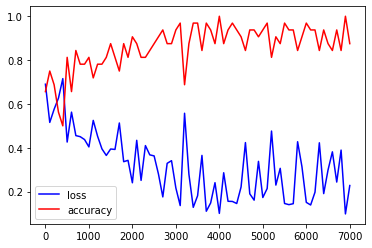

In [18]:
fig, ax = plt.subplots()
ax.plot(accloss['step'],accloss['loss'],'b',label='loss')
ax.plot(accloss['step'],accloss['train_acc'],'r',label='accuracy')
leg = ax.legend()

In [19]:
def compute_table(predikce, labels):
    table = {'TP':0,'TN':0,'FP':0,'FN':0}
    for i in range(0,len(labels)):
        if predikce[i][0] >= 0.5 and labels[i][0] == 1:
            table['TN'] += 1
            continue
        if predikce[i][1] >= 0.5 and labels[i][1] == 1:
            table['TP'] += 1
            continue
        if predikce[i][1] >= 0.5 and labels[i][0] == 1:
            table['FP'] += 1
            continue
        if predikce[i][0] >= 0.5 and labels[i][1] == 1:
            table['FN'] += 1
            continue
    return table

In [20]:
def compute_cross_entropy(predikce, labels):
    l = 0
    for i in range(0,len(labels)):
        l += (labels[i][1]*math.log(predikce[i][1]))+((1-labels[i][1])*math.log(1-predikce[i][1]))
    return -l/len(labels)

In [21]:
print('Validation data:')
pred_table=compute_table(valid_predikce, valid_labels)
print('\tTabulka:',pred_table)
                 
senzitivita = 0
if (pred_table['TP']+pred_table['FN']) != 0:
    senzitivita = pred_table['TP']/(pred_table['TP']+pred_table['FN'])
        
specificita = 0
if (pred_table['TP']+pred_table['FP']) != 0:
    specificita = pred_table['TP']/(pred_table['TP']+pred_table['FP'])
        
mean = 0
if (senzitivita+specificita) != 0:
    mean = (2*senzitivita*specificita)/(senzitivita+specificita)

ce = compute_cross_entropy(valid_predikce, valid_labels)

print('\tCross entropy:',ce)
print('\tSenzitivita:',senzitivita)
print('\tSpecificita:',specificita)
print('\tHarmonic mean:',mean)

Validation data:
	Tabulka: {'TP': 1409, 'TN': 1326, 'FP': 174, 'FN': 91}
	Cross entropy: 0.22060265322488815
	Senzitivita: 0.9393333333333334
	Specificita: 0.8900821225521163
	Harmonic mean: 0.9140447615958482


In [22]:
print('Test data:')
pred_table=compute_table(test_predikce, test_labels)
print('\tTabulka:',pred_table)
                 
senzitivita = 0
if (pred_table['TP']+pred_table['FN']) != 0:
    senzitivita = pred_table['TP']/(pred_table['TP']+pred_table['FN'])
        
specificita = 0
if (pred_table['TP']+pred_table['FP']) != 0:
    specificita = pred_table['TP']/(pred_table['TP']+pred_table['FP'])
        
mean = 0
if (senzitivita+specificita) != 0:
    mean = (2*senzitivita*specificita)/(senzitivita+specificita)

ce = compute_cross_entropy(test_predikce, test_labels)

print('\tCross entropy:',ce)
print('\tSenzitivita:',senzitivita)
print('\tSpecificita:',specificita)
print('\tHarmonic mean:',mean)

Test data:
	Tabulka: {'TP': 3677, 'TN': 3367, 'FP': 619, 'FN': 309}
	Cross entropy: 0.2722006745257096
	Senzitivita: 0.9224786753637733
	Specificita: 0.8559124767225326
	Harmonic mean: 0.8879497705868148
